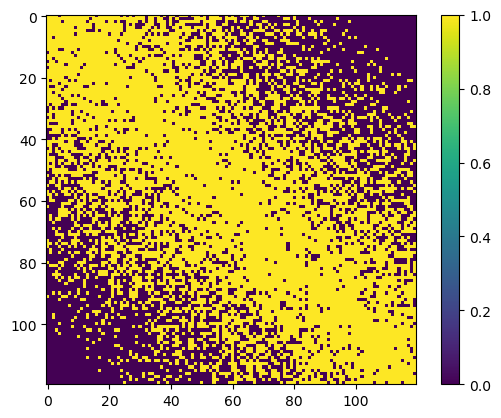

In [6]:
import random
import numpy as np
from matplotlib import pyplot as plt


size = 120
wrec_mask = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        chance = np.abs(i-j)/100
        rand_num = random.random()
        connect = 0
        if rand_num >= chance:
            connect = 1
        else: 
            connect = 0
        wrec_mask[i,j] = connect

        
plt.figure()
plt.imshow(wrec_mask)
plt.colorbar()
plt.set_cmap('viridis')
plt.show()

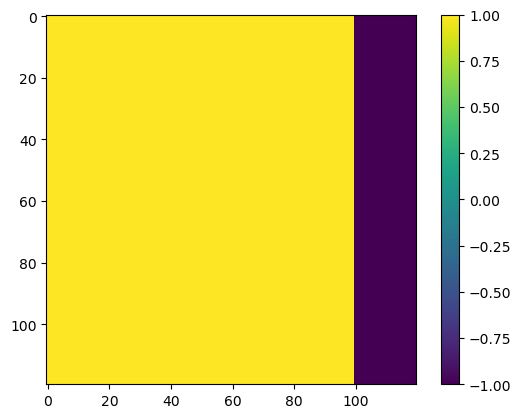

In [9]:
wrec_mask = np.ones((size, size))
wrec_mask[:,100:120] = -1

plt.figure()
plt.imshow(wrec_mask)
plt.colorbar()
plt.set_cmap('viridis')
plt.show()



A = np.random.rand(size, size)


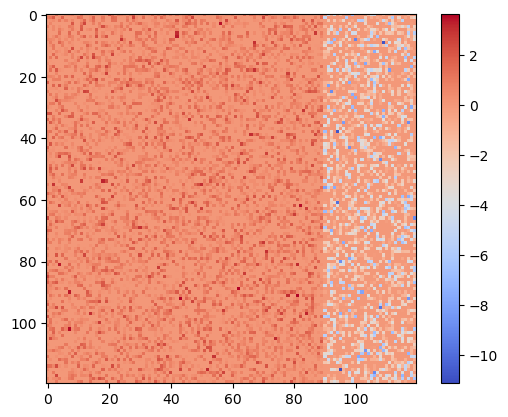

In [37]:
wrec = np.random.normal(0, 1, (size,size))

wrec[:,0:90] = np.maximum(0,wrec[:,0:90])
wrec[:,90:120] = 3*np.minimum(0,wrec[:,90:120])

plt.figure()
plt.imshow(wrec)
plt.colorbar()
plt.set_cmap('coolwarm')
plt.show()


In [38]:
np.sum(wrec)

-49.557674270402046

In [43]:
import numpy as np

# Create a random 100x100 matrix A
A = wrec

# Perform SVD on matrix A
U, s, V = np.linalg.svd(A, full_matrices=False)

# Define the desired low-rank approximation rank
k = 10  # You can adjust this as needed for your desired rank

# Construct low-rank matrices B and C
B = U[:, :k] @ np.diag(s[:k])  # B = U * Sigma_k
C = V[:k, :]  # C = V_k

# Verify that B * C equals A
approx_A = B @ C

# Output the shapes of matrices
print("Shape of matrix A:", A.shape)
print("Shape of matrix B:", B.shape)
print("Shape of matrix C:", C.shape)
print()

# Output the Frobenius norm to measure the approximation error
approx_error = np.linalg.norm(A - approx_A, 'fro')
print(f"Frobenius norm (approximation error): {approx_error:.6f}")

Shape of matrix A: (120, 120)
Shape of matrix B: (120, 10)
Shape of matrix C: (10, 120)

Frobenius norm (approximation error): 94.102964


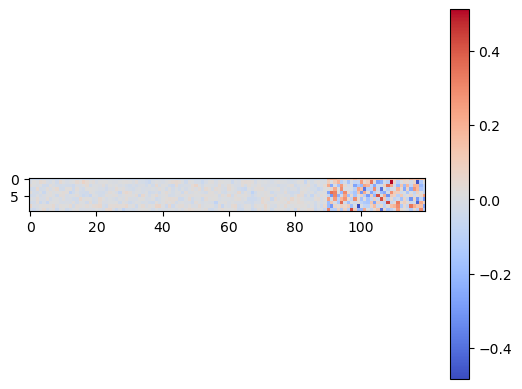

In [46]:
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.set_cmap('coolwarm')
plt.show()

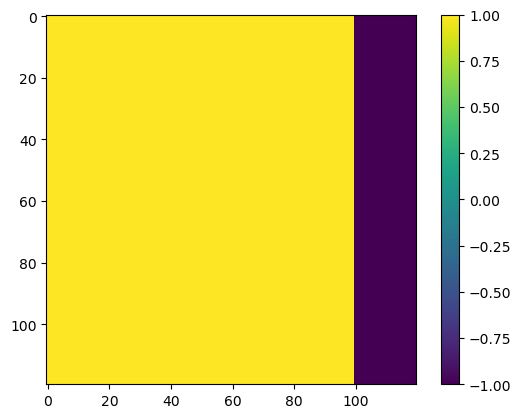

In [11]:
plt.figure()
plt.imshow(approx_A)
plt.colorbar()
plt.set_cmap('viridis')
plt.show()